# Unit Root Testing

In [1]:
import arch.data.default
import yfinance as yf 
import matplotlib.pyplot as plt 
import pandas as pd 
import statsmodels.api as sm 
from arch.unitroot import ADF, DFGLS, PhillipsPerron, KPSS, ZivotAndrews, VarianceRatio

plt.style.use('bmh')

In [2]:
default_data = arch.data.default.load()
default_data['yield_diff'] = default_data.BAA - default_data.AAA
default_data

,AAA,BAA,yield_diff
Date,,,
1919-01-01,5.35,7.12,1.77
1919-02-01,5.35,7.20,1.85
1919-03-01,5.39,7.15,1.76
1919-04-01,5.44,7.23,1.79
1919-05-01,5.39,7.09,1.70
...,...,...,...
2018-08-01,3.88,4.77,0.89
2018-09-01,3.98,4.88,0.90
2018-10-01,4.14,5.07,0.93


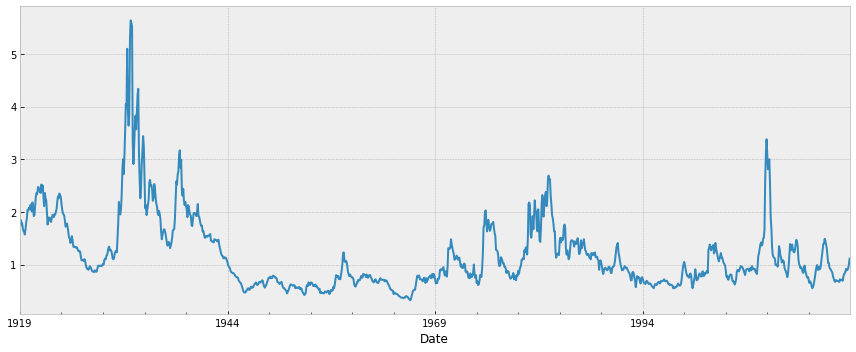

In [3]:
default_data.yield_diff.plot(figsize=(12,5))
plt.tight_layout()
plt.show()

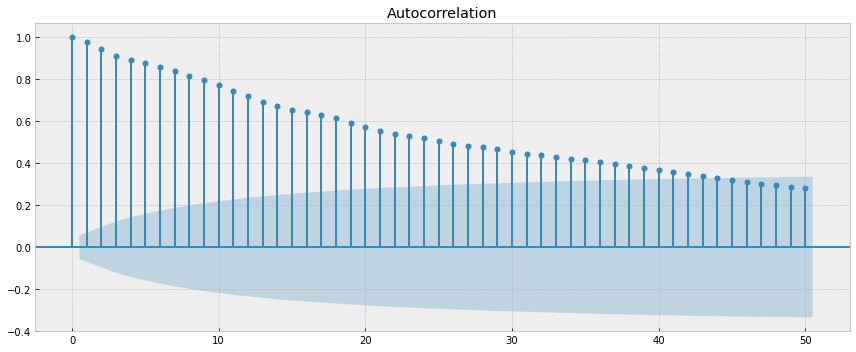

In [4]:
fig = sm.graphics.tsa.plot_acf(default_data.yield_diff, lags=50)
fig.set_size_inches(12,5)
plt.tight_layout()

## Augmented Dickey-Fuller Testing

In [5]:
adf = ADF(default_data.yield_diff)
print(adf.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.356
P-value                         0.013
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [6]:
adf_reg = adf.regression
print(adf_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     10.26
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           3.23e-32
Time:                        17:25:52   Log-Likelihood:                 663.36
No. Observations:                1178   AIC:                            -1281.
Df Residuals:                    1155   BIC:                            -1164.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0220      0.007     -3.356      0.0

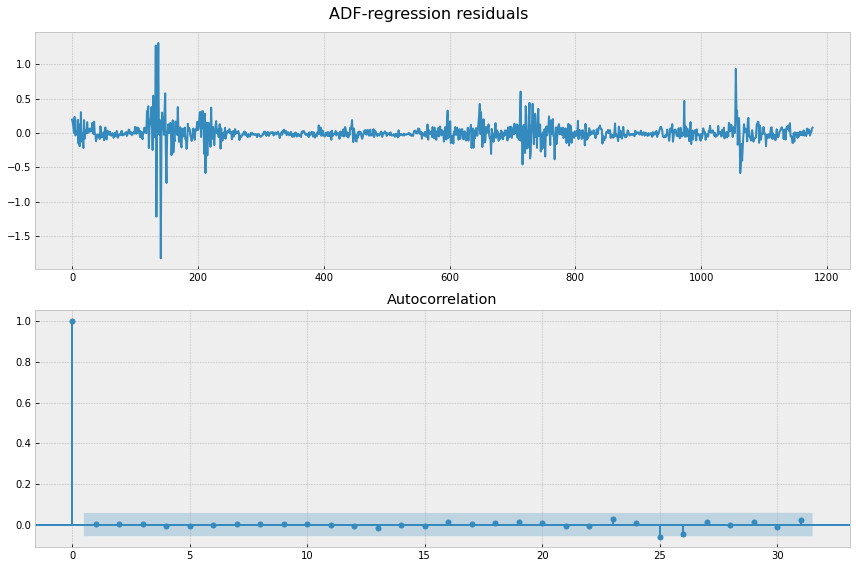

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))

ax[0].plot(adf_reg.resid)
fig = sm.tsa.graphics.plot_acf(adf_reg.resid, ax=ax[1])

fig.suptitle('ADF-regression residuals', fontsize=16)
plt.tight_layout()
plt.show()

## Dickey-Fuller GLS Testing

In [8]:
dfgls = DFGLS(default_data.yield_diff)
print(dfgls.summary())

      Dickey-Fuller GLS Results      
Test Statistic                 -2.322
P-value                         0.020
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: -2.59 (1%), -1.96 (5%), -1.64 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## Phillips-Perron Testing

In [9]:
pp = PhillipsPerron(default_data.yield_diff)
print(pp.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.898
P-value                         0.002
Lags                               23
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## KPSS Testing

In [10]:
kpss = KPSS(default_data.yield_diff)
print(kpss.summary())

    KPSS Stationarity Test Results   
Test Statistic                  1.088
P-value                         0.002
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


## Zivot-Andrews Test

In [11]:
za = ZivotAndrews(default_data.yield_diff)
print(za.summary())

        Zivot-Andrews Results        
Test Statistic                 -4.900
P-value                         0.040
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.


## Variance Ratio Testing
* usually not use to test unit root
* test whether return series is
* pure random walk vs have some predictability

In [12]:
# not use to test unit root
# test whether return series is
# pure random walk vs have some predictability

In [13]:
sp500 = yf.download('^GSPC', period='5y', interval='1d', auto_adjust=True)
returns = sp500.Close.pct_change(1).dropna()
returns

[*********************100%***********************]  1 of 1 completed


Date
2017-03-24   -0.000844
2017-03-27   -0.001020
2017-03-28    0.007251
2017-03-29    0.001085
2017-03-30    0.002935
                ...   
2022-03-16    0.022384
2022-03-17    0.012348
2022-03-18    0.011662
2022-03-21   -0.000435
2022-03-22    0.011304
Name: Close, Length: 1258, dtype: float64

In [14]:
vr = VarianceRatio(returns, lags=12)
print(vr.summary())

     Variance-Ratio Test Results     
Test Statistic                 -2.274
P-value                         0.023
Lags                               12
-------------------------------------

Computed with overlapping blocks (de-biased)
